In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import mnist_prep
from plotting_functions import nn_plot_epoch_acc
from enkf_functions import enkf_classifier
from saving_functions import load_objects
from model_functions import nn_load
import reproducible
import no_gpu

In [4]:
X_train, X_test, y_train, y_test = mnist_prep()

In [5]:
layers = 5
neurons = [128, 128, 64, 32, 10]

In [6]:
setting_dict = {"particles": 1,
                "epochs": 10,
                "batch_size": 1000,    # len(X_train)
                "h_0": 2,
                "delta": 0.005,
                "epsilon": 0.5,
                "randomization": False,
                "shuffle": True,
                "early_stopping": False,
                "early_stopping_diff": 0.001
               }

In [7]:
particle_list = [50, 100, 250, 500]

In [8]:
import time

Epoch 1. Training Accuracy: 0.332, Test Accuracy: 0.332.
Epoch 2. Training Accuracy: 0.339, Test Accuracy: 0.336.
Epoch 3. Training Accuracy: 0.341, Test Accuracy: 0.338.
Epoch 4. Training Accuracy: 0.342, Test Accuracy: 0.339.
Epoch 5. Training Accuracy: 0.343, Test Accuracy: 0.34.
Epoch 6. Training Accuracy: 0.343, Test Accuracy: 0.342.
Epoch 7. Training Accuracy: 0.344, Test Accuracy: 0.343.
Epoch 8. Training Accuracy: 0.344, Test Accuracy: 0.343.
Epoch 9. Training Accuracy: 0.345, Test Accuracy: 0.344.
Epoch 10. Training Accuracy: 0.345, Test Accuracy: 0.344.
Calculation time for 50 particles: 21.52728725671768 minutes.


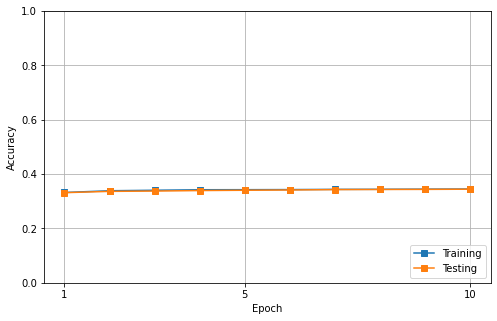

Epoch 1. Training Accuracy: 0.423, Test Accuracy: 0.438.
Epoch 2. Training Accuracy: 0.455, Test Accuracy: 0.472.
Epoch 3. Training Accuracy: 0.465, Test Accuracy: 0.482.
Epoch 4. Training Accuracy: 0.47, Test Accuracy: 0.487.
Epoch 5. Training Accuracy: 0.473, Test Accuracy: 0.491.
Epoch 6. Training Accuracy: 0.475, Test Accuracy: 0.495.
Epoch 7. Training Accuracy: 0.478, Test Accuracy: 0.498.
Epoch 8. Training Accuracy: 0.48, Test Accuracy: 0.5.
Epoch 9. Training Accuracy: 0.481, Test Accuracy: 0.502.
Epoch 10. Training Accuracy: 0.482, Test Accuracy: 0.502.
Calculation time for 100 particles: 46.120366446177165 minutes.


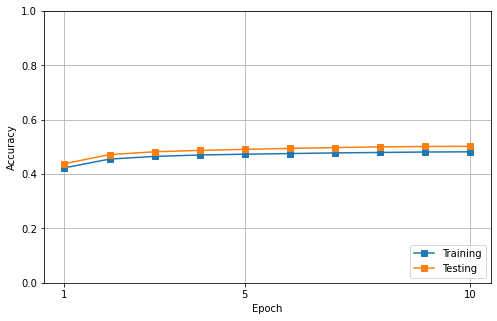

Epoch 1. Training Accuracy: 0.479, Test Accuracy: 0.484.
Epoch 2. Training Accuracy: 0.556, Test Accuracy: 0.563.
Epoch 3. Training Accuracy: 0.577, Test Accuracy: 0.583.
Epoch 4. Training Accuracy: 0.589, Test Accuracy: 0.593.
Epoch 5. Training Accuracy: 0.595, Test Accuracy: 0.598.
Epoch 6. Training Accuracy: 0.599, Test Accuracy: 0.605.
Epoch 7. Training Accuracy: 0.602, Test Accuracy: 0.609.
Epoch 8. Training Accuracy: 0.605, Test Accuracy: 0.612.
Epoch 9. Training Accuracy: 0.608, Test Accuracy: 0.615.
Epoch 10. Training Accuracy: 0.609, Test Accuracy: 0.617.
Calculation time for 250 particles: 138.21034188667934 minutes.


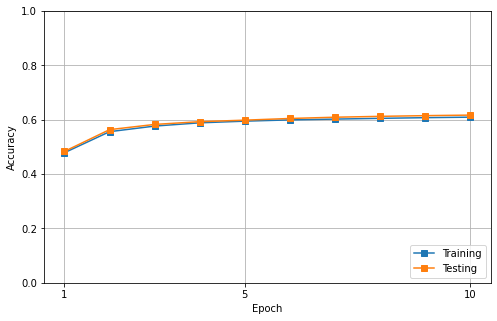

Epoch 1. Training Accuracy: 0.471, Test Accuracy: 0.48.
Epoch 2. Training Accuracy: 0.619, Test Accuracy: 0.626.
Epoch 3. Training Accuracy: 0.659, Test Accuracy: 0.664.
Epoch 4. Training Accuracy: 0.683, Test Accuracy: 0.691.
Epoch 5. Training Accuracy: 0.696, Test Accuracy: 0.705.
Epoch 6. Training Accuracy: 0.705, Test Accuracy: 0.713.
Epoch 7. Training Accuracy: 0.71, Test Accuracy: 0.718.
Epoch 8. Training Accuracy: 0.714, Test Accuracy: 0.722.
Epoch 9. Training Accuracy: 0.717, Test Accuracy: 0.725.
Epoch 10. Training Accuracy: 0.721, Test Accuracy: 0.727.
Calculation time for 500 particles: 737.0283068577448 minutes.


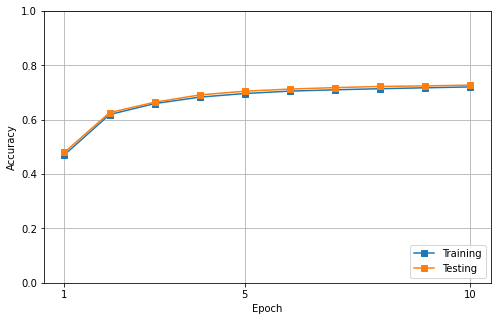

In [9]:
for p in particle_list:
    setting_dict["particles"] = p
    
    import random
    import os
    import numpy as np
    import tensorflow as tf

    os.environ['PYTHONHASHSEED'] = '0'
    np.random.seed(42)
    random.seed(42)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads = 1, inter_op_parallelism_threads = 1)
    tf.compat.v1.set_random_seed(42)
    sess = tf.compat.v1.Session(graph = tf.compat.v1.get_default_graph(), config = session_conf)
    tf.compat.v1.keras.backend.set_session(sess)
    
    start_time = time.time()
    mean_model, mean_model_train_acc, mean_model_test_acc = enkf_classifier(X_train,
                                                                            X_test,
                                                                            y_train,
                                                                            y_test,
                                                                            layers,
                                                                            neurons,
                                                                            setting_dict,
                                                                            save_all = True,
                                                                            file_var = "../objects/mnist/enkf_mnist_full_E{}_B{}_P{}_H{}.pckl".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]),
                                                                            file_model = "../models/mnist/enkf_mnist_full_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]),
                                                                            verbose = 1)
    end_time = time.time()
    print("Calculation time for {} particles: {} minutes.".format(p, (end_time - start_time) / 60))
    
    nn_plot_epoch_acc(mean_model_train_acc,
                      mean_model_test_acc,
                      mean_comparison = None,
                      savefig = True,
                      file = "../img/mnist/enkf_mnist_full_E{}_B{}_P{}_H{}.png".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))

In [10]:
obj_dict = load_objects("../objects/mnist/enkf_mnist_full_E{}_B{}_P{}_H{}.pckl".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))

In [11]:
final_model = nn_load("../models/mnist/enkf_mnist_full_E{}_B{}_P{}_H{}.h5".format(setting_dict["epochs"], setting_dict["batch_size"], setting_dict["particles"], setting_dict["h_0"]))